<a href="https://colab.research.google.com/github/FransHutagalung/Lang-Graph/blob/main/Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 16.4 MB/s eta 0:00:00


In [2]:
pip install ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.9 MB/s eta 0:00:00


In [5]:
from typing import Dict , TypedDict , List
from langgraph.graph import StateGraph

In [21]:
# build AI Agent State
class AgentState(TypedDict) : # our state schema
  message : str
  name : str
  values : List[int]

def greeting_node(state : AgentState) -> AgentState :
  """Simple Node that adds a greeting message to the state """
  state["message"] = "hey " + state["message"] + " how is your day going ?"
  return state

def learning_graduate(state : AgentState) -> AgentState :
  state["message"] = f"{state['name']} , you are doing an amazing job learning LangGraph!"
  return state

def process_values(state : AgentState) -> AgentState :
  print(state)
  state["message"] = f"Hello {state['name']} your values is {sum(state['values'])}"
  print(state)
  return state


In [33]:
class AgentState(TypedDict) :
  values : List[int]
  operation : str
  result : int

def result_values(state : AgentState) -> AgentState :
  if state["operation"] == "sum" :
    state["result"] = sum(state["values"])
  elif state["operation"] == "average" :
    state["result"] = sum(state["values"]) / len(state["values"])
  elif state["operation"] == "multiple" :
    state["result"] = 1
    for value in state["values"] :
      state["result"] *= value

  return state

In [34]:
graph = StateGraph(AgentState)

In [12]:
graph.add_node("learning_graduate" , learning_graduate)
graph.add_node("greeter" , greeting_node)
graph.add_node("process_values" , process_values)

In [35]:
graph.add_node("math" , result_values)

In [13]:
graph.set_entry_point("learning_graduate")

In [36]:
graph.set_entry_point("math")
graph.set_finish_point("math")

In [16]:
graph.add_edge("learning_graduate", "greeter")
graph.add_edge("greeter", "process_values")

In [17]:
graph.set_finish_point("process_values")

In [37]:
app = graph.compile()

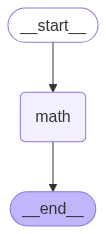

In [38]:
from IPython.display import Image ,  display
display(Image(app.get_graph().draw_mermaid_png()))

In [42]:
result = app.invoke({"values" : [1,2,3,4], "operation" : "multiple"})

In [43]:
print(result)

{'values': [1, 2, 3, 4], 'operation': 'multiple', 'result': 24}
